# BE Smart Cities
## Smart Energy Homes

Par Taroni Anna, Le Floch Yann, Simon Léonard, Mathieu Nina, Miranda Flavie 



### 1.Introduction

Buildings usually consume about 40% of overall energy consumption, which makes it one of the key sectors in the fight against global warming and the energy transition.

The aim of this project is to model the thermal control of a building to understand how the energy efficiency can be improved. There are several parameters to be taken into account, such as the geometry of the building or the materials it is made of.
We are thus going to create a building model and then perform relevant energy simulations on it with Matlab. We will then discuss the various results obtained in order to draw the best possible conclusion. 


### 2.Hypothesis

The modelisation of our building is based on numerous hypothesis :
We made the simplification to study all forms of heat transfer linearly. Indeed, for instance, we used a coefficient to approximate exchanges by radiation.
 The distribution of solar radiation within the classroom and the corridor is considered as diffuse.
We have also simplified the study of walls : 
Temperature is considered uniform on each wall or each windows
The heat transfer in each wall or window is considered as unidimensional

### 3. Description of the building: dimensions, materials and its operation

The building we have chosen to model is a class room. The figure below gives its plan and its sections.










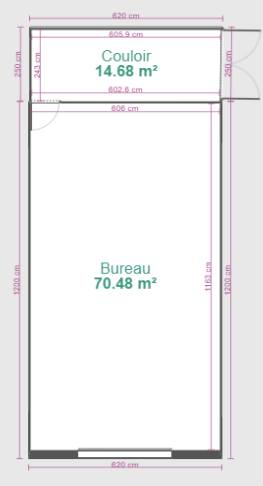

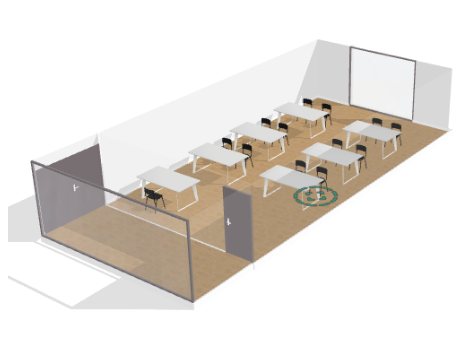

We made several hypothesis concerning our building : 
- Both lateral walls are considered adiabatic. Indeed, there are two other classrooms on either side at the same temperature as our room. Thus, the thermal exchanges can be neglected.
- Moreover, for the same reasons both floor and ceiling are considered adiabatic.
- We considered the corridor wall as a single large window.
- We placed the back wall window in the middle of the wall.
- Concerning our windows, we chose single glazing. (6mm)

We have chosen following specific materials for the constitution of our external walls but also for interior walls :




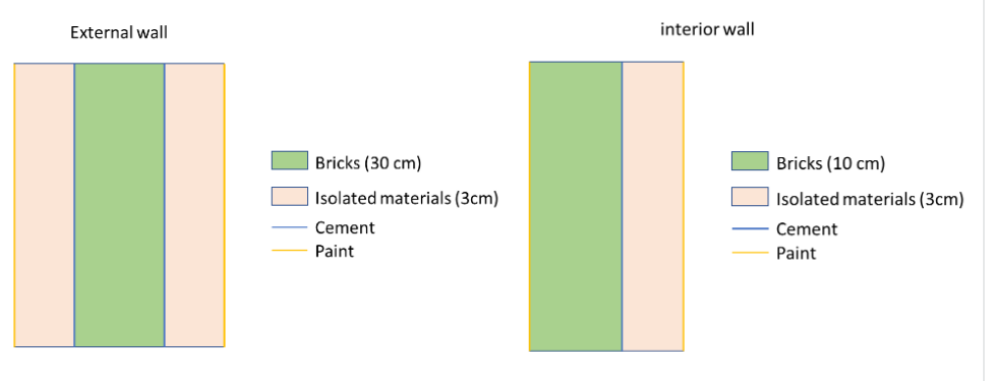

These different materials have the following characteristics : 


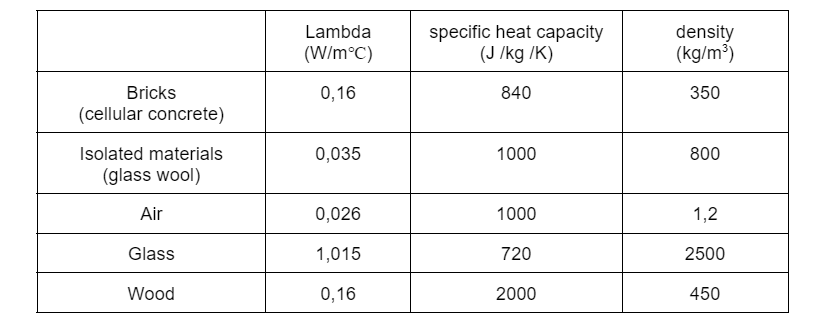

### 4. Modelling

#### a. Thermal model

	Our thermal model is based on the three fundamental principles of thermodynamics : 

- 0th principle concerning the temperature scales : e1= teta0 - teta1 + b  
- 1st principle concerning the energy conservation : q1 - q2 = -f
- 2nd principle concerning the direction and the value of the heat : q1 = G1*e1



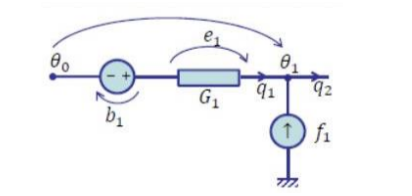

The figure below gives our complet thermal model taking into account convection and conduction for each flow.


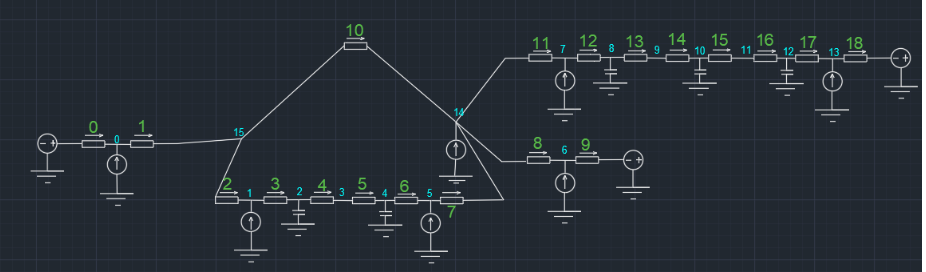


In order to find our model, we must calculate several terms. 

First, the conductances for the three phenomenons (convection, conduction) can be find with the following formula :
- For conduction : Gcond= lambda*S/e  , with  the conductivity of the specific materials, S the surface and e the thickness of the materials. 
- For convection : Gconv= h*S , with h the convection coefficient. 
We chose to work with conductance instead of resistance, because it would be easier to calculate the matrix G later. 

Moreover, we need to calculate the capacity which is in the thermal schema such as :
C = rho c e S 
with rho the density and c the specific capacity, that were given previously for each material. 

### 5. Implementation and simulation

#### a. Matrix

The system is controlled by the following differential equation :

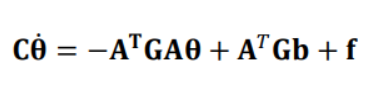


Where :
- C : capacity matrix
- teta: vector of temperatures in the nodes of the thermal circuit
- A : arc-node incidence matrix, with elements 1 for an arc which enters the node, -1 for an arc which exits a node, and zero otherwise
- G : conductance matrix
- b: vector of temperature sources on the branches with elements 1 if there is a source and 0 if there is no source
- f: vector of flow-rate sources in the nodes with elements 1 if there is a source and 0 if there is no source

Sizes of the following matrix are directly linked to the numbers of resistances and nodes. In our case, thanks to the previous schemes we observe that we have 15 nodes and 18 résistances.

We have made the following script that take into account all the propeties of our class room, in order to find the previous matrix mentionned above



In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 30 13:39:49 2022

@author: 
Taroni Anna
Le Floch Yann
Simon Léonard
Mathieu Nina
Miranda Flavie
"""

# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import pandas as pd
import dm4bem
import matplotlib.pyplot as plt


# P-controler gain
#Kp = 1e4            # almost perfect controller Kp -> ∞
Kp = 1e-3           # no controller Kp -> 0


L = 12
lw1 = 3
lw2 = 6.2
hi= 2.5
lc = 2.5
ldoor = 1
Sw1=hi*lw1
Sw2=hi*lw2
Swext = (lw2-lw1)*hi
Swint = (lw2 - ldoor)*hi
Sext = Swext + Sw1
Sdoor = ldoor*hi
Sc=lc*hi
#Ssomme = 2*Sgrand + 3*Sptiot + 2*Sc  # m² surface of concrete & insulation of the 5 walls

#volume_air
Va_c = lc*hi*lw2
Va_r = lw2*L*hi
Va = Va_c + Va_r

#materials
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/kg.K

wall_ext = {'Conductivity': [0.035, 0.16, 0.035 ],  # W/m.K
        'Density': [800, 350, 800],        # kg/m³
        'Specific heat': [1000, 840, 1000],  # J/kg.K
        'Width': [0.03, 0.3, 0.03],
        'Surface': [Sext, Sext, Sext],  # m²
       }                # number of discretizations
wall_ext = pd.DataFrame(wall_ext, index=['Insulation', 'Concrete', 'Insulation'])


window1 = {'Conductivity': [1.015],  # W/m.K
        'Density': [2500],        # kg/m³
        'Specific heat': [720],  # J/kg.K
        'Width': [0.006],
        'Surface': [Sw1],  # m²
       }                # number of discretizations
window1 = pd.DataFrame(window1, index=[ 'Glass'])

window2 = {'Conductivity': [1.015],  # W/m.K
        'Density': [2500],        # kg/m³
        'Specific heat': [720],  # J/kg.K
        'Width': [0.006],
        'Surface': [Sw2],  # m²
       }                # number of discretizations
window2 = pd.DataFrame(window2, index=[ 'Glass'])

wall_int = {'Conductivity': [0.035, 0.16 ],  # W/m.K
        'Density': [800, 350],        # kg/m³
        'Specific heat': [1000, 840],  # J/kg.K
        'Width': [0.03, 0.3],
        'Surface': [Sext, Sext],  # m²
       }                # number of discretizations
wall_int = pd.DataFrame(wall_int, index=['Insulation', 'Concrete'])

door = {'Conductivity': [0.16],  # W/m.K
        'Density': [450],        # kg/m³
        'Specific heat': [2000],  # J/kg.K
        'Width': [0.05],
        'Surface': [Sdoor],  # m²
       }                # number of discretizations
door = pd.DataFrame(door, index=['Wood'])




ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity
#
σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant
#
#
Fwg = 1 / 5     # view factor wall - glass
#
#
#
Tm = 20 + 273   # mean temp for radiative exchange

# convection coefficients, W/m² K
h = pd.DataFrame([{'in': 4, 'out': 10}])

h = np.array([4, 10])
# Conduction
G_cd_wall_ext = wall_ext['Conductivity'] / wall_ext['Width'] * wall_ext['Surface']
G_cd_wall_int = wall_int['Conductivity'] / wall_int['Width'] * wall_int['Surface']
G_cd_door = door['Conductivity'] / door['Width'] * door['Surface']
G_cd_window1 = window1['Conductivity'] / window1['Width'] * window1['Surface']
G_cd_window2 = window2['Conductivity'] / window2['Width'] * window2['Surface']

# Convection
G_wall_ext = h * wall_ext['Surface'][0]  # wall
G_wall_int = h * wall_int['Surface'][0]     # wall
G_door = h * door['Surface'][0]  #door
G_window1 = h * window1['Surface'][0] #window1
G_window2 = h * window2['Surface'][0]  #window2

# # Long-wave radiation exchnage
# GLW1 = ε_wLW / (1 - ε_wLW) * wall['Surface']['Insulation'] * 4 * σ * Tm**3
# GLW2 = Fwg * wall['Surface']['Insulation'] * 4 * σ * Tm**3
# GLW3 = ε_gLW / (1 - ε_gLW) * wall['Surface']['Glass'] * 4 * σ * Tm**3
#
#
# # long-wave exg. wall-glass
# GLW = 1 / (1 / GLW1 + 1 / GLW2 + 1 / GLW3)
#
# # ventilation & advection
# Gv = Va_dot * air['Density'] * air['Specific heat']

# glass: convection outdoor & conduction
Ggs1 = 1 / (1 / G_window1[0] + 1 / (2 * G_cd_window1))
Ggs2 = 1 / (1 / G_window2[1] + 1 / (2 * G_cd_window2))

#door
G_door_tot = float(1 / (1 / G_door[0] + 1 / (2 * G_cd_door)))

# Thermal capacities
C_wall_ext = wall_ext['Density'] * wall_ext['Specific heat'] * wall_ext['Surface'] * wall_ext['Width']
C_wall_int = wall_int['Density'] * wall_int['Specific heat'] * wall_int['Surface'] * wall_int['Width']
C_window1 = window1['Density'] * window1['Specific heat'] * window1['Surface'] * window1['Width']
C_window2 = window2['Density'] * window2['Specific heat'] * window2['Surface'] * window2['Width']
C_door = door['Density'] * door['Specific heat'] * door['Surface'] * door['Width']
C_air = air['Density'] * air['Specific heat'] * Va


#Incidence matrix
A = np.zeros([19, 16])
A[0, 0] = 1
A[1, 0], A[1, 15] = -1, 1
A[2, 15], A[2, 1] = -1, 1
A[3, 1], A[3, 2] = -1, 1
A[4, 2], A[4, 3] = -1, 1
A[5, 3], A[5, 4] = -1, 1
A[6, 4], A[6, 5] = -1, 1
A[7, 5], A[7, 14] = -1, 1
A[10, 14],  A[10, 15] = 1,-1
A[8, 14], A[8, 6] = 1, -1
A[9, 6]= 1
A[18, 13]= 1
A[17, 13], A[18, 12] = -1,1
A[16, 12], A[18, 11] = 1,-1
A[14, 10], A[18, 9] = -1,1
A[13, 9], A[18, 8] = -1,1
A[12, 8], A[18, 7] = -1,1
A[11, 7], A[11, 14] = 1,-1
np.set_printoptions(suppress=False)


g = np.zeros(19)
g[0] = Ggs2
g[1] = G_window2[0]
g[2] = G_wall_int[0]
g[3] = 2*G_cd_wall_int[1]
g[4] = 2*G_cd_wall_int[1]
g[5] = 2*G_cd_wall_int[0]
g[6] = 2*G_cd_wall_int[0]
g[7] = G_wall_int[0]
g[8] = Ggs1
g[9] = G_window1[1]
g[10]= G_door_tot
g[11]=G_wall_ext[0]
g[12]=2*G_cd_wall_ext[0]
g[13]=2*G_cd_wall_ext[0]
g[14]=2*G_cd_wall_ext[1]
g[15]=2*G_cd_wall_ext[1]
g[16]=2*G_cd_wall_ext[2]
g[17]=2*G_cd_wall_ext[2]
g[18]=G_wall_ext[1]

G = np.diag(g)
np.set_printoptions(precision=3, threshold=16, suppress=True)

#Thermal capacities
c = np.zeros(16)
c[2] = C_wall_int[1]
c[4] = C_wall_int[0]
c[8] = C_wall_ext[0]
c[10] =C_wall_ext[1]
c[12] =C_wall_ext[2]

C = np.diag(c)

#constraints

b = np.zeros(19)
b[[0, 9, 18]] = np.array([10, 10, 10]) + 273

f = np.zeros(16)
f[[0, 1, 5, 6, 7, 13, 14]] = 1000 + np.array([800, 400, 500, 7000, 300, 12, 4040])

y = np.zeros(16)
y[14] = 1
y[15] = 1

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])


[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
yade = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(yade, precision=3, suppress_small=True))

df = pd.DataFrame(data=[yss, yade])

ModuleNotFoundError: No module named 'dm4bem'

We thus find the matrix above.




#### b. Step response

We first performed a simulation with a constant input: the outdoor temperature is fixed arbitrarily at a constant value of 1°C and then 10°C in the form of a step.

Here is the code with the above fixed constraint : 


In [6]:
#First part :  Static constraints

b = np.zeros(19)
b[[0, 9, 18]] = np.array([10, 10, 10]) + 273

f = np.zeros(16)
f[[0, 1, 5, 6, 7, 13, 14]] = 1000 + np.array([800, 400, 500, 7000, 300, 12, 4040])

y = np.zeros(16)
y[14] = 1
y[15] = 1

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])


[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
yade = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(yade, precision=3, suppress_small=True))

df = pd.DataFrame(data=[yss, yade])

NameError: name 'dm4bem' is not defined

In [7]:
b = np.zeros(19)
b[[0, 9, 18]] = 1

f = np.zeros(16)
f[[0, 1, 5, 6, 7, 13, 14]] = 1

y = np.zeros(16)
y[14] = 1
y[15] = 1

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

# Thermal circuit -> state-space
# ==============================
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

dt = 360

duration = 3600 * 24 * 31

n = int(np.floor(duration / dt))

t = np.arange(0, n * dt, dt) 

# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)
# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([10, n])
u[0:3, :] = 10 * np.ones([3, n])

temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])
        
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()


ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {ytc[6]:.4f} °C')
print(f'- response to step input:{float(y_exp[:, -2]):.4f} °C')

NameError: name 'dm4bem' is not defined

We try different case to observe and understand the comportement of the system :
(the case above and the following one: different temperature input)

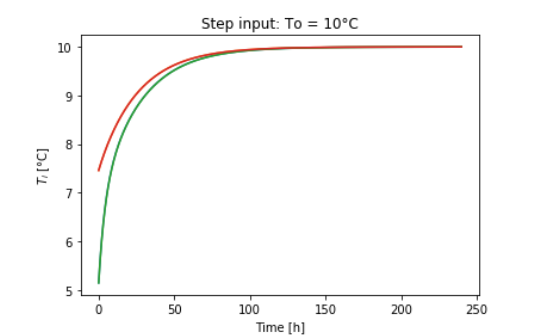


We can observe that in both cases: the two temperatures, which represent two different nodes of our system, converge, after 125 hours, towards the imposed outdoor temperature. Indeed, after a long period of time, the system reaches an equilibrium where the outdoor temperature and the room temperature are equal.



#### c. Simulation with weather data


Then the goal of the study was to observe the model facing different temperature throught the day. We thus made the following code to observe the system in dynamic. We used data temperature from Lyon to test our model. 

In [8]:

b = np.zeros(19)
b[[0, 9, 18]] = 1

f = np.zeros(16)
f[[0, 1, 5, 6, 7, 13, 14]] = 1

y = np.zeros(16)
y[14] = 1
y[15] = 1

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])


[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
yade = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(yade, precision=3, suppress_small=True))

df = pd.DataFrame(data=[yss, yade])


#Simulation with weather data

dt = 360
duration = 3600 * 24 * 2

filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

#SOLAR IRRADIATION

surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

#TIME STEP OF dt
data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

#Indoor temperature setpoint
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

#Time
t = dt * np.arange(data.shape[0])

#Input vector is formed by the temperature sources and the heat flow sources 
# Vectors of state and input (in time)
n_tC = As.shape[0]
u = pd.concat([data['To'], data['To'], data['To'], data['Ti'],
               α_wSW * Swext * data['Φt1'],α_wSW * Swext * data['Φt1'],α_wSW * Swext * data['Φt1'],
               τ_gSW * α_wSW * (Sw1+Sw2) * data['Φt1'],
               data['Qa'],
               α_gSW * (Sw1+Sw2) * data['Φt1']], axis=1)
#Initial value of state vector
temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

#Euler integration in time
I = np.eye(n_tC)
for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]




###PLOT

y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()


NameError: name 'dm4bem' is not defined

We can observe the results in the graph above.
The first graph illustrate the evolution of the temperature both inside and outside the room. We can see the impact of the radiation on the indoor temperature which is very important. Indeed, the difference between outside temperature and inside temperature is really significant. Each peak corresponding more or less to the middle of the day, when sun irradiance is maximal. 
We can also remarks that the outside temperture has not a big a big impact and the inside temperature because there cariation are not very linked. 

Concerning the heat flows in the second graph, we add an HVAC to adjust the temperature inside the room. We can can conclude that the HVAC is efficient because the temperature inside the room is rapidely corrected.

### Conclusion

Through this BE, we have modeled the floor of a building in order to understand the heat exchanges of a building. The objective of these simulations is to reduce energy consumption in order to move towards more ecological energy consumption.
By taking into account many aspects: room geometry, insulation, windows, doors, exterior and interior heat flows, heating and ventilation systems, we were able to model two rooms of a building and we performed energy simulations of our building.
We obtained relevant results, our system responds quickly and the HVAC controls our system correctly.

These simulations remain ideal simulations, which help to predict reality but which don’t correspond exactly to it since in reality many aspects can modify the results: variation of occupation, variable radiation etc. This BE is nevertheless a first relevant approach of the thermal models.